# Läs in kommundata

In [21]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Lomma har id 1262 och har som senast totalt 23684 människor som bodde i kommunen. Snittåldern är 44 år, samt hade år 2017 en befolkningstäthet på: 437 människor/km^2. Det bor 2529 utrikesfödda i kommunen.


# Läs in bankomatdata

In [22]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 337501, som finns på addressen Lundgatan, i Vimmerby kommun. Det finns 17 transaktionsadata registrerade. ÄrUte = True
Slumpmässig transaktion
{'månad': '2014M01', 'antalTransaktioner': 7298, 'omsättning': 6605900}


# Deskriptiv Analys

* Testar slumpmässig bankomat för brainstorming

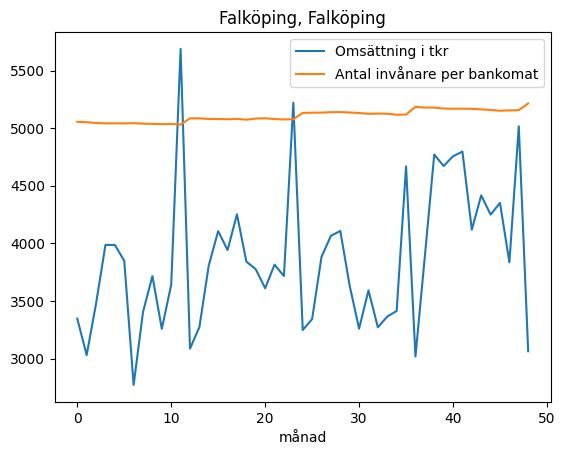

In [23]:
from analysis_models import AnalysModeller


analyser = AnalysModeller(data)

analyser.slumpmässigBankomatOmsättning()

* Testar samband mellan omsättning och befolkningstäthet

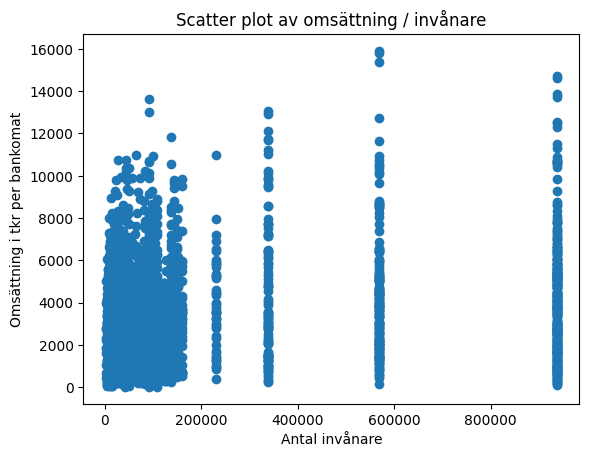

In [24]:
analyser.scatterPlotOmsättningPerInvånare()

# Ser att detta ger oss väldigt lite information. 
* Pelarna är de olika storstäderna, och där är automaterna väldigt spridda. 
* Kan vara relevant att istället kolla på omsättningen per invånare per bankomat

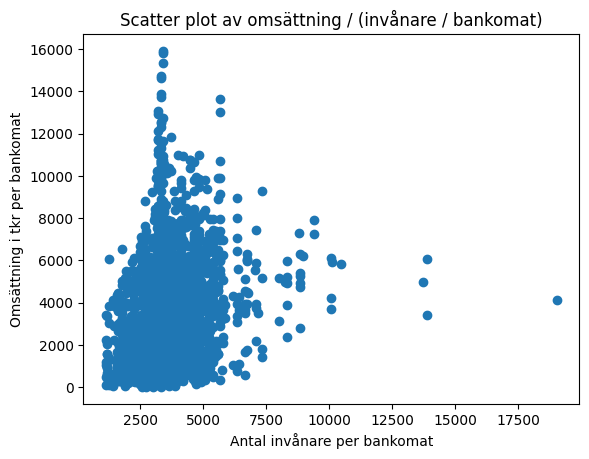

In [25]:
analyser.scatterPlotOmsättningPerInvånarePerBankomat()

# Detta ger lite mer information
* Vi ser att det inte finns ett kontinuerligt samband mellan befolkning per automat och omsättning
* När det finns för få invånare per bankomat finns det relativt liten omsättning
* När det finns för många invånare per bankomat finns det relativt liten omsättning (Vad kan det bero på?)
* I området mellan 2500 - 6000 invånare per bankomat ser vi att det finns som störst omsättning (Varför det?)

Ekerö 341.180794416061 sek/capita 134.0
Knivsta 217.67038049190666 sek/capita 71.4
Markaryd 1604.9564813859956 sek/capita 19.7
Borgholm 1535.2518786264625 sek/capita 16.0
Svalöv 362.49065693430657 sek/capita 37.4
Malmö 1404.4706590225687 sek/capita 2277.0
Dals-Ed 1416.325669642857 sek/capita 6.4
Karlsborg 1629.9025504938818 sek/capita 17.4
Gullspång 1450.1848942598187 sek/capita 16.5
Bengtsfors 1444.6974543816175 sek/capita 10.5
Åmål 1796.252666609779 sek/capita 25.4
Skara 1400.2462699077955 sek/capita 43.8
Munkfors 1539.7876480541456 sek/capita 26.1
Grums 1788.6227848101266 sek/capita 23.6
Filipstad 1470.7698090207232 sek/capita 6.7
Fagersta 1808.439471407221 sek/capita 49.6
Orsa 1444.5954381752701 sek/capita 4.0
Ockelbo 1616.6730288976098 sek/capita 5.5
Krokom 374.59672064503013 sek/capita 2.5
Bjurholm 1465.5822616407982 sek/capita 1.8
Arvidsjaur 1562.0885363357215 sek/capita 1.1


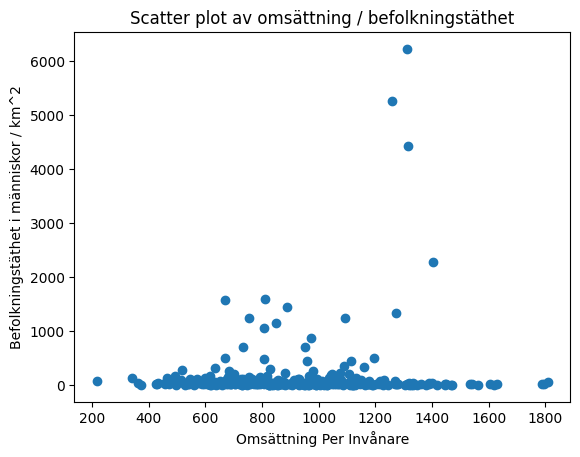

In [26]:
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()

Vallentuna 8553187.5 97.4
Österåker 6566326.571428572 157.3
Värmdö 9686567.2 104.6
Järfälla 8223620.0 1588.8
Ekerö 9482779.0 134.0
Huddinge 7552007.5 875.0
Botkyrka 13573402.5 491.6
Salem 6962438.666666667 320.7
Haninge 9960184.5 214.5
Tyresö 9859894.857142856 711.4
Upplands-Bro 9360036.666666666 135.4
Nykvarn 9589738.0 76.4
Täby 6010007.111111111 1238.0
Danderyd 7626478.888888889 1239.7
Sollentuna 9917182.923076924 1449.1
Stockholm 8334583.745583039 5260.1
Södertälje 10269420.57142857 195.5
Nacka 6796331.769230769 1155.2
Sundbyberg 9586827.857142856 6229.3
Solna 7094467.4 4434.4
Lidingö 7726844.5 1578.1
Vaxholm 3220640.8 206.5
Norrtälje 6053901.166666667 32.5
Sigtuna 6578247.875 158.3
Nynäshamn 6803109.0 84.1
Håbo 7009994.333333333 158.6
Älvkarleby 9690838.0 43.4
Knivsta 8283664.0 71.4
Heby 6316574.0 12.4
Tierp 6568552.0 13.9
Uppsala 7691229.666666667 111.0
Enköping 7241947.111111111 40.6
Östhammar 5901470.25 15.2
Vingåker 5476262.0 24.3
Gnesta 6339734.5 25.2
Nyköping 5343373.33333333

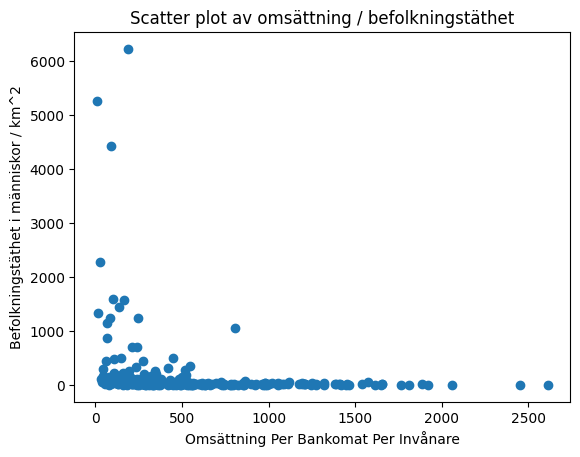

In [27]:
analyser.scatterPlotOmsättningPerAutomatMotBefolkningstäthet()

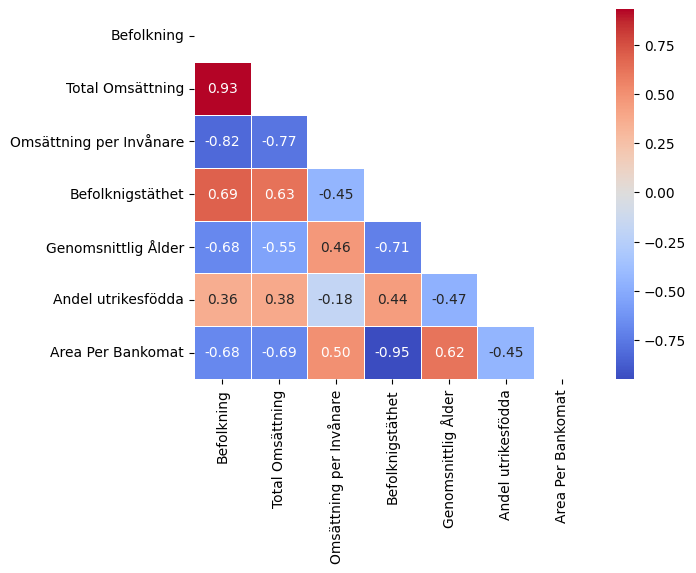

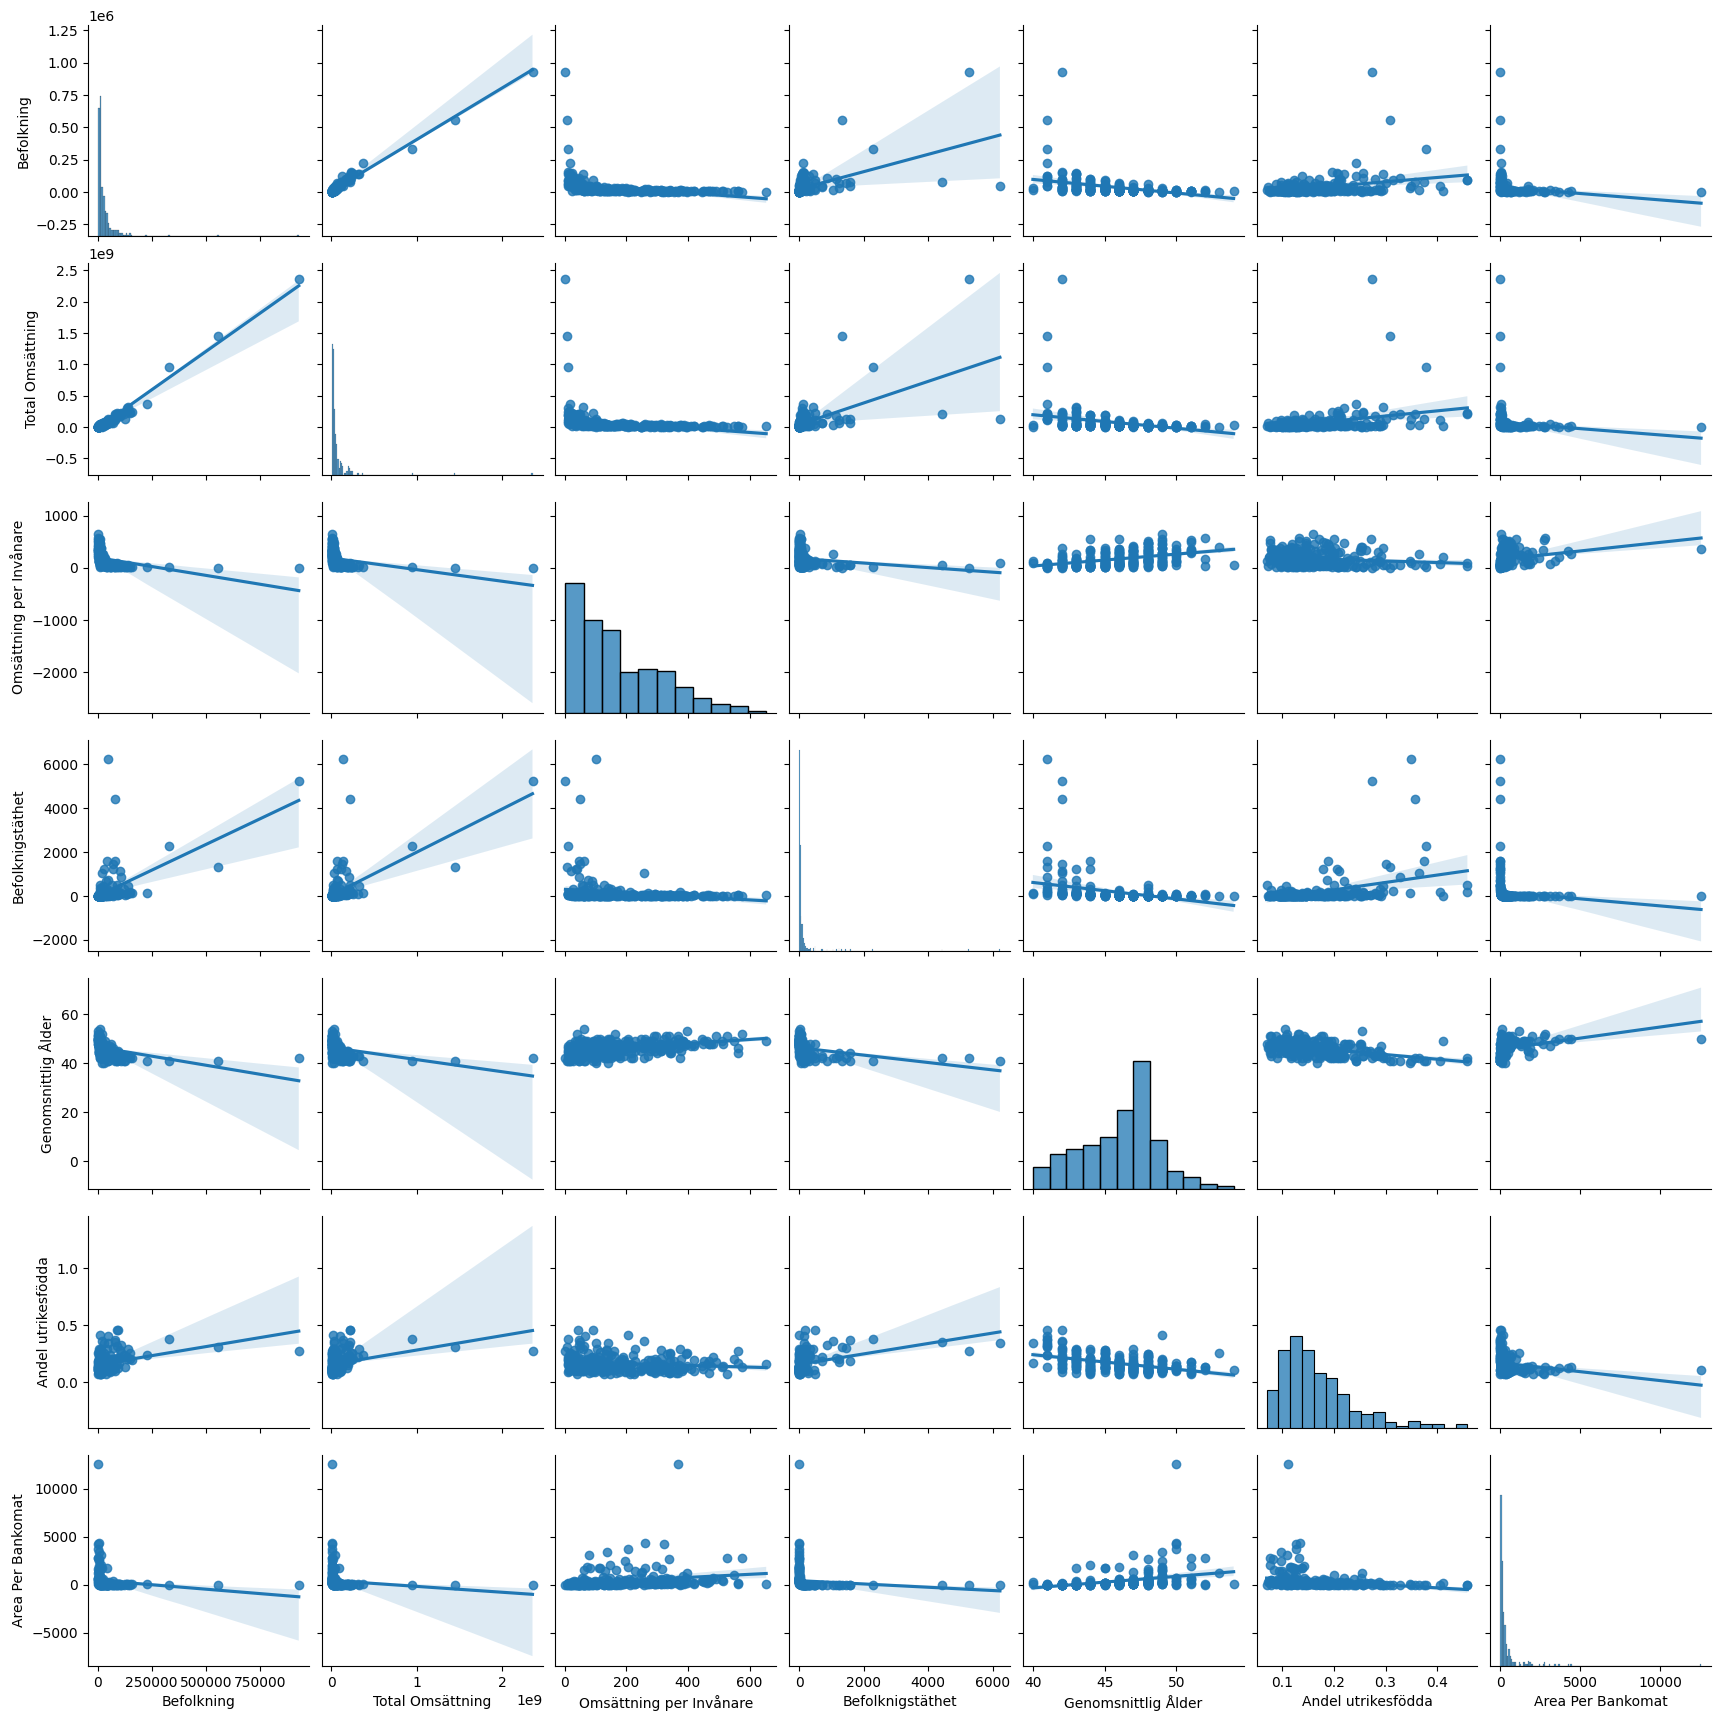

In [35]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

month = "2022M01"
year = int(month[0:4])

dataDict = defaultdict(dict)

for kommun in data.kommuner:
    try:
        namn = kommun.namn
        befolkning = kommun.data[month]["total"]
        totalOmsättning = kommun.totalOmsättning
        bankomaterMedSEK = [bankomat for bankomat in data.bankomater if bankomat.transaktionsDataSEK]
        öppnaBankomaterIKommunen = [
            bankomat for bankomat in bankomaterMedSEK
            if (int(bankomat.transaktionsDataSEK[-1]["månad"][0:4]) > year 
                or (int(bankomat.transaktionsDataSEK[-1]["månad"][0:4]) == year 
                    and int(bankomat.transaktionsDataSEK[-1]["månad"][5:]) > int(month[5:]))) 
                    and bankomat.geographicalData["kommun"] == kommun.namn]
        omsättningPerInvånare = sum([[transaktionsData["omsättning"] 
                                        for transaktionsData 
                                        in bankomat.transaktionsDataSEK 
                                        if transaktionsData["månad"] == month] 
                                        for bankomat 
                                        in öppnaBankomaterIKommunen][0]) / kommun.data[month]["total"]
        antalBankomater = kommun.antalBankomater
        befolkningstäthet = kommun.befolkningstätheter[year]
        snittÅlder = kommun.snittÅlder
        antalTransaktioner = kommun.totalTransaktionsAntal
        antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
        genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal 
        antalInvånarePerBankomat = befolkning / kommun.antalBankomater
        utrikesFödda = kommun.utrikesfödda[year]
        andelUtrikesfödda = utrikesFödda / befolkning
        bankomatTäthet = kommun.bankomatTäthet
        if omsättningPerInvånare == 0:
            raise Exception("Bankomaten var stängd vid undersökningstillfället")
    except: pass
    try:
        dataDict[namn] = {
            "Befolkning": befolkning,
            "Total Omsättning": totalOmsättning,
            "Omsättning per Invånare": omsättningPerInvånare,
            "Befolknigstäthet": befolkningstäthet,
            "Genomsnittlig Ålder": snittÅlder,
            "Andel utrikesfödda": andelUtrikesfödda,
            "Area Per Bankomat": bankomatTäthet,
        }
    except: pass

df = pd.DataFrame(dataDict)
df.to_csv("initialResults.tsv", sep="\t")


sns.heatmap(df.T.corr(method="spearman"), cmap="coolwarm", mask=np.triu(np.ones_like(df.T.corr())), annot=True, fmt=".2f", linewidths=.5)

seaborn = sns
seaborn.pairplot(data=df.T, kind="reg")
plt.show()

In [29]:
print("Spearman: ")
print(df.T.corr(method="spearman"))
print("Pearson")
print(df.T.corr(method="pearson"))

Spearman: 
                         Befolkning  Total Omsättning  \
Befolkning                 1.000000          0.928979   
Total Omsättning           0.928979          1.000000   
Omsättning per Invånare   -0.522447         -0.542213   
Befolknigstäthet           0.693429          0.626011   
Genomsnittlig Ålder       -0.680687         -0.552463   
Andel utrikesfödda         0.358782          0.381728   
Area Per Bankomat         -0.678202         -0.686875   

                         Omsättning per Invånare  Befolknigstäthet  \
Befolkning                             -0.522447          0.693429   
Total Omsättning                       -0.542213          0.626011   
Omsättning per Invånare                 1.000000         -0.339839   
Befolknigstäthet                       -0.339839          1.000000   
Genomsnittlig Ålder                     0.332239         -0.714553   
Andel utrikesfödda                     -0.107942          0.442046   
Area Per Bankomat                       0.

# Mellan vilka demografier och bankomatdata ser vi samband


* Antal bankomater och total omsättning
* Antal bankomater och total befolkning
* Antal transaktioner och total befolkning
* Omsättning och total antalTransakttioner
* Antal bankomater och antal transaktioner
* Omsättning per invånare och bankomater per invåndare
* Antal transaktioner per bankomat och antal invånare per bankomat
* Omsättning per invånare och antal invånare per bankomat (Omvänt proportionella)
* Antal bankomater och befolkningstäthet
* Antal invånare per bankomat och genomsnittlig ålder (Omvänt proportionell)
* Omsättning per invånare och genomsnittlig ålder

In [30]:
print(df)

                         Upplands Väsby    Vallentuna     Österåker  \
Befolkning                 4.550600e+04  3.266600e+04  4.587400e+04   
Total Omsättning           8.569685e+07  3.421275e+07  4.596429e+07   
Omsättning per Invånare    8.261548e+01  1.420070e+02  0.000000e+00   
Befolknigstäthet           1.200000e+00  9.740000e+01  1.573000e+02   
Genomsnittlig Ålder        4.500000e+01  4.200000e+01  4.300000e+01   
Andel utrikesfödda         1.389082e-01  1.736668e-01  1.895409e-01   
Area Per Bankomat          1.742112e+03  8.943250e+01  4.462143e+01   

                               Värmdö      Järfälla         Ekerö  \
Befolkning               4.405200e+04  7.884400e+04  2.771600e+04   
Total Omsättning         4.843284e+07  1.315779e+08  1.896556e+07   
Omsättning per Invånare  2.824843e+01  0.000000e+00  0.000000e+00   
Befolknigstäthet         1.046000e+02  1.588800e+03  1.340000e+02   
Genomsnittlig Ålder      4.300000e+01  4.100000e+01  4.300000e+01   
Andel utrikesfödd

              index  Befolkning  Total Omsättning  Omsättning per Invånare  \
0    upplands väsby         0.0               0.0                 0.000000   
1    Upplands Väsby     45506.0        85696850.0                82.615479   
2        Vallentuna     32666.0        34212750.0               142.006980   
3         Österåker     45874.0        45964286.0                 0.000000   
4            Värmdö     44052.0        48432836.0                28.248434   
..              ...         ...               ...                      ...   
286           Luleå     75430.0       113459132.0                15.947236   
287           Piteå     40528.0        63570564.0                 0.000000   
288           Boden     26945.0        30150758.0                 0.000000   
289       Haparanda      9147.0        14117982.0               206.854706   
290          Kiruna     21561.0        43589008.0                 0.000000   

     Befolknigstäthet  Genomsnittlig Ålder  Andel utrikesfödda 

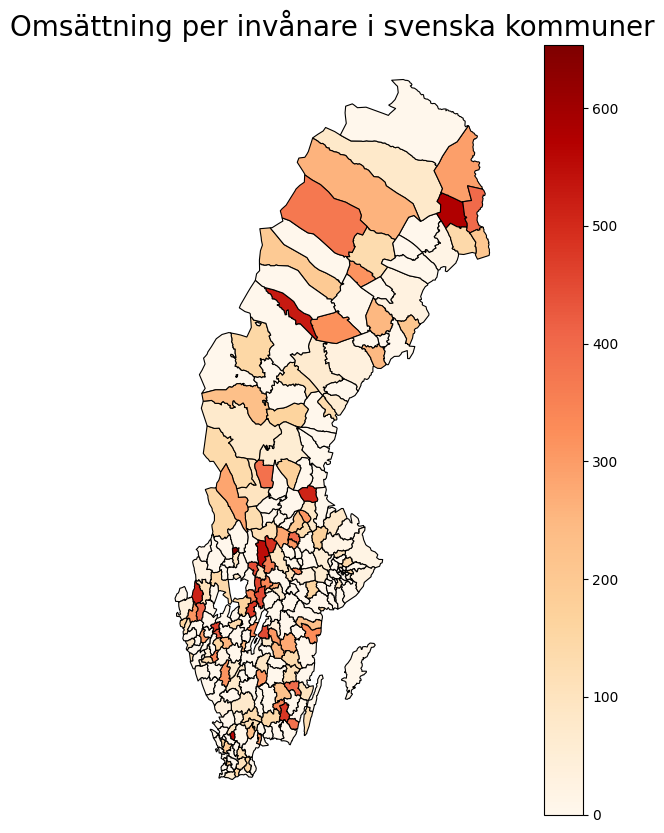

In [31]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Read GeoJSON file into a GeoDataFrame
sweden = gpd.read_file("swedish_municipalities.geojson")

# Transpose the DataFrame and reset the index
df_T = df.T.reset_index()


# Create a new DataFrame with a single row containing the desired values
new_row = pd.DataFrame({'index': ['upplands väsby'], **{col: [0] for col in df_T.columns[1:]}})

# Concatenate the original DataFrame and the new row
df_T = pd.concat([new_row, df_T], ignore_index=True)

print(df_T)

# Merge the two DataFrames based on the municipality name
merged = sweden.merge(df_T, left_on='kom_namn', right_on='index')

print(merged)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heatmap
merged.plot(column='Omsättning per Invånare', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Add a title
ax.set_title('Omsättning per invånare i svenska kommuner', fontdict={'fontsize': 20})

# Remove the axis
ax.axis('off')

# Show the plot
plt.show()



In [32]:
"""import plotly.express as px
import plotly.graph_objs as go

# Create a choropleth map with Plotly
lukas = "Befolkning"
fig = px.choropleth_mapbox(merged,
                           geojson=merged.geometry,
                           locations=merged.index,
                           color= lukas,
                           color_continuous_scale='OrRd',
                           opacity=0.8,
                           mapbox_style='carto-positron',
                           center={'lat': 63.0, 'lon': 16.0},
                           zoom=4,
                           hover_name='kom_namn')


# Update the map layout
fig.update_layout(title= lukas + ' i svenska kommuner', title_font_size=24, margin=dict(l=0, r=0, t=50, b=0))

# Show the plot
#fig.show()"""

'import plotly.express as px\nimport plotly.graph_objs as go\n\n# Create a choropleth map with Plotly\nlukas = "Befolkning"\nfig = px.choropleth_mapbox(merged,\n                           geojson=merged.geometry,\n                           locations=merged.index,\n                           color= lukas,\n                           color_continuous_scale=\'OrRd\',\n                           opacity=0.8,\n                           mapbox_style=\'carto-positron\',\n                           center={\'lat\': 63.0, \'lon\': 16.0},\n                           zoom=4,\n                           hover_name=\'kom_namn\')\n\n\n# Update the map layout\nfig.update_layout(title= lukas + \' i svenska kommuner\', title_font_size=24, margin=dict(l=0, r=0, t=50, b=0))\n\n# Show the plot\n#fig.show()'

In [33]:
from scipy.stats import f_oneway

# Create a DataFrame with three groups of data


# Run the ANOVA analysis
f_value, p_value = f_oneway(*df["Area Per Bankomat"])

# Print the results
print('F-value:', f_value)
print('P-value:', p_value)

KeyError: 'Area Per Bankomat'

In [ ]:
import statsmodels.api as sm
X = df_T[['Genomsnittlig Ålder', 'Antal Invånare Per Bankomat','Andel utrikesfödda', 'Befolknigstäthet']]
Y = df_T['Total Omsättning']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Omsättning   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     40.05
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.30e-26
Time:                        21:22:00   Log-Likelihood:                -5853.2
No. Observations:                 290   AIC:                         1.172e+04
Df Residuals:                     285   BIC:                         1.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [34]:
def dataframe(month):
    year = int(month[0:4])
    dataDict = defaultdict(dict)

    for kommun in data.kommuner:
        try:
            namn = kommun.namn
            befolkning = kommun.data[month]["total"]
            totalOmsättning = kommun.totalOmsättning
            bankomaterMedSEK = [bankomat for bankomat in data.bankomater if bankomat.transaktionsDataSEK]
            öppnaBankomaterIKommunen = [
                bankomat for bankomat in bankomaterMedSEK
                if (int(bankomat.transaktionsDataSEK[-1]["månad"][0:4]) > year 
                    or (int(bankomat.transaktionsDataSEK[-1]["månad"][0:4]) == year 
                        and int(bankomat.transaktionsDataSEK[-1]["månad"][5:]) > int(month[5:]))) 
                        and bankomat.geographicalData["kommun"] == kommun.namn]
            omsättningPerInvånare = sum([[transaktionsData["omsättning"] 
                                            for transaktionsData 
                                            in bankomat.transaktionsDataSEK 
                                            if transaktionsData["månad"] == month] 
                                            for bankomat 
                                            in öppnaBankomaterIKommunen][0]) / kommun.data[month]["total"]
            antalBankomater = kommun.antalBankomater
            befolkningstäthet = kommun.befolkningstätheter[year]
            snittÅlder = kommun.snittÅlder
            antalInvånarePerBankomat = befolkning / kommun.antalBankomater
            utrikesFödda = kommun.utrikesfödda[year]
            andelUtrikesfödda = utrikesFödda / befolkning
            dataDict[namn] = {
                "Date" : month,
                "Befolkning": befolkning,
                "Total Omsättning": totalOmsättning,
                "Omsättning per Invånare": omsättningPerInvånare,
                "Befolknigstäthet": befolkningstäthet,
                "Genomsnittlig Ålder": snittÅlder,
                "Andel utrikesfödda": andelUtrikesfödda,
            }
        except: 
            pass

    daf = pd.DataFrame(dataDict)

    return daf


daf = dataframe("2014M01")
for month in data.kommuner[0].data.keys():
    if month != "total" and month != "2014M01": 
        new_df = dataframe(month)
        daf = pd.concat([daf, new_df], axis=1)

daf = daf.T
print(daf)
daf = daf.drop('Date', axis=1)
print(daf)

               Date Befolkning Total Omsättning Omsättning per Invånare  \
Vallentuna  2014M01      29765         34212750              198.773728   
Österåker   2014M01      38456         45964286               94.000936   
Värmdö      2014M01      37770         48432836               80.577178   
Järfälla    2014M01      65447        131577920                68.89697   
Ekerö       2014M01      24974         18965558              109.053416   
...             ...        ...              ...                     ...   
Luleå       2022M12      75272        113459132               23.202519   
Piteå       2022M12      40203         63570564              110.519115   
Boden       2022M12      26631         30150758              233.915362   
Haparanda   2022M12       8956         14117982              394.249665   
Kiruna      2022M12      21200         43589008               76.334906   

           Antal Bankomater Befolknigstäthet Genomsnittlig Ålder  \
Vallentuna                4    

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define the predictor variables
A = daf[['Utrikesfödda']]
#A = [1,2,3]


# define the response variable
B = daf['Total Omsättning']

#B = [3,2,1]

# Add a constant term to the predictor variables
A = sm.add_constant(A)

# Fit the multiple linear regression model
model = sm.OLS(B.astype(float), A.astype(float)).fit()

print(model.summary())

# create a DataFrame to hold the VIF results
#vif_df = pd.DataFrame({'variable': A.columns})

# calculate the VIF for each independent variable
#vif_df['vif'] = [variance_inflation_factor(A.values.astype(float), i) for i in range(A.shape[1])]

# print the VIF results
#print(vif_df)


                            OLS Regression Results                            
Dep. Variable:       Total Omsättning   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.058e+06
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        13:47:06   Log-Likelihood:            -5.8153e+05
No. Observations:               31212   AIC:                         1.163e+06
Df Residuals:                   31210   BIC:                         1.163e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.204e+06   1.79e+05     34.642   

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X = daf[['Genomsnittlig Ålder', 'Befolkning', 'Antal Invånare Per Bankomat', 'Andel utrikesfödda']]  # independent variables
y = daf['Total Omsättning']  # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the independent variables using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Ridge regression model on the scaled training data
ridge = Ridge(alpha=1)  # choose an appropriate value of alpha
ridge.fit(X_train_scaled, y_train)

# Obtain the coefficients, p-values, f-values, and t-values of the model
X_train_sm = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.astype(float), X_train_sm.astype(float))
results = model.fit()
summary = results.summary()

# Print the evaluation metric and the coefficients of the model
print(f'Ridge Regression Score: {ridge.score(X_test_scaled, y_test):.2f}')
coefficients = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefficient'])
print(coefficients)

# Print the p-values, f-values, and t-values of the coefficients
coef_pvalues = pd.DataFrame({'p-value': results.pvalues, 'f-value': results.fvalue, 't-value': results.tvalues}, index=X_train.columns)
print(coef_pvalues)


Ridge Regression Score: 0.98
                              Coefficient
Genomsnittlig Ålder          1.342704e+07
Befolkning                   1.775570e+08
Antal Invånare Per Bankomat -1.774071e+06
Andel utrikesfödda           5.752329e+06
                             p-value        f-value  t-value
Genomsnittlig Ålder              NaN  262617.269634      NaN
Befolkning                       NaN  262617.269634      NaN
Antal Invånare Per Bankomat      NaN  262617.269634      NaN
Andel utrikesfödda               NaN  262617.269634      NaN


In [ ]:
from scipy.stats import ttest_ind

median_befolkningstathet = daf['Befolknigstäthet'].median()
print('Median befolkningstäthet: ' + str(median_befolkningstathet))
df1 = daf[daf['Befolknigstäthet'] >= median_befolkningstathet] #tät
df2 = daf[daf['Befolknigstäthet'] < median_befolkningstathet] #mindre tät

statistic1, pvalue1 = ttest_ind(df1['Omsättning per Invånare'].astype(float), df2['Omsättning per Invånare'].astype(float))

mean1_stor = df1['Omsättning per Invånare'].mean()
mean1_liten = df2['Omsättning per Invånare'].mean()
print("Medelvärde tät: " + str(mean1_stor))
print("Medelvärde otät: " + str(mean1_liten))
print("t-test statistic:", statistic1)
print("p-value:", pvalue1)
print('____________________________')


median_age = daf['Genomsnittlig Ålder'].median()
print("Medianålder: " + str(median_age))

df3 = daf[daf['Genomsnittlig Ålder'] >= median_age ] #gamla
df4 = daf[daf['Genomsnittlig Ålder'] < median_age] #unga
mean_gamla = df3['Omsättning per Invånare'].mean()
mean_unga = df4['Omsättning per Invånare'].mean() 
print("Medelvärde gamla: " + str(mean_gamla))
print("Medelvärde unga: " + str(mean_unga))

statistic2, pvalue2 = ttest_ind(df3['Omsättning per Invånare'].astype(float), df4['Omsättning per Invånare'].astype(float))
print("t-test statistic:", statistic2)
print("p-value:", pvalue2)

print('____________________________')
median_blattar = daf['Andel utrikesfödda'].median() 
print("Median blattar: " + str(median_blattar))

df5 = daf[daf['Andel utrikesfödda'] >= median_blattar] #blattar
df6 = daf[daf['Andel utrikesfödda'] < median_blattar] #inga blattar
mean_blattar = df5['Omsättning per Invånare'].mean()
mean_inga_blattar = df6['Omsättning per Invånare'].mean()
print("Medelvärde blattar: " + str(mean_blattar))
print("Medelvärde inga blattar: " + str(mean_inga_blattar))

statistic3, pvalue3 = ttest_ind(df5['Omsättning per Invånare'].astype(float), df6['Omsättning per Invånare'].astype(float))
print("t-test statistic:", statistic3)
print("p-value:", pvalue3)
print('____________________________')

median_aipb = daf['Antal Invånare Per Bankomat'].median()
print("Median aipb: " + str(median_aipb))
df7 = daf[daf['Antal Invånare Per Bankomat'] >= median_aipb] #Hög aipb
df8 = daf[daf['Antal Invånare Per Bankomat'] < median_aipb] #Låg aipb

mean_hog_aipb = df7['Omsättning per Invånare'].mean()
mean_lag_aipb = df8['Omsättning per Invånare'].mean()
print("Medelvärde hög aipb: " + str(mean_hog_aipb))
print("Medelvärde låg aipb: " + str(mean_lag_aipb))

statistic4, pvalue4 = ttest_ind(df7['Omsättning per Invånare'].astype(float), df8['Omsättning per Invånare'].astype(float))
print("t-test statistic:", statistic4)
print("p-value:", pvalue4)
print('____________________________')

median_befolkning = daf['Befolkning'].median()
print('Median befolkning: ' + str(median_befolkning))
df9 = daf[daf['Befolkning'] >= median_befolkning] #större
df10 = daf[daf['Befolkning'] < median_befolkning] #mindre

statistic5, pvalue5 = ttest_ind(df9['Omsättning per Invånare'].astype(float), df10['Omsättning per Invånare'].astype(float))

mean_grande = df9['Omsättning per Invånare'].mean()
mean_pequeno = df10['Omsättning per Invånare'].mean()
print("Medelvärde grande: " + str(mean_grande))
print("Medelvärde pequeno: " + str(mean_pequeno))
print("t-test statistic:", statistic5)
print("p-value:", pvalue5)
print('____________________________')

NameError: name 'daf' is not defined